# Data Import

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display # Allows the use of display() for DataFrames
%matplotlib inline

# Import our raw data into a Pandas Dataframe
# low_memory is just to make the 'mixed types' warning go away.
df1 = pd.read_csv('delta_public_87_99.csv', low_memory=False)
df2 = pd.read_csv('delta_public_00_12.csv', low_memory=False)

# Combine the 87-99 data with the 00-12 data into one frame
frames = [df1, df2]
data = pd.concat(frames)

## Data Exploration

In [2]:
# Get number of observations and number of attributes
print data.shape

(215613, 974)


In [3]:
# Get some summary statistics of our target variable
display(data['total_enrollment'].describe())

count    153168.000000
mean       2809.486148
std        7540.511589
min           0.000000
25%         101.000000
50%         481.000000
75%        2344.000000
max      380232.000000
Name: total_enrollment, dtype: float64

In [4]:
# Drop rows with missing enrollment data
data = data[np.isfinite(data['total_enrollment'])]
data.shape

(153168, 974)

,total_enrollment,totalcompletions,assets06,loan_num,fte_count
count,153168.000000,139169.000000,6.296600e+04,68345.000000,151361.000000
mean,2809.486148,593.236129,1.798120e+08,240.711777,2112.358154
std,7540.511589,1456.242667,1.134594e+09,747.546118,5771.201134
min,0.000000,0.000000,-3.721908e+06,0.000000,0.000000
25%,101.000000,56.000000,1.868081e+06,15.000000,87.909080
50%,481.000000,189.000000,1.912804e+07,82.000000,424.714240
75%,2344.000000,544.000000,8.559663e+07,262.000000,1818.719801
max,380232.000000,92011.000000,6.410306e+10,106840.000000,380232.000000


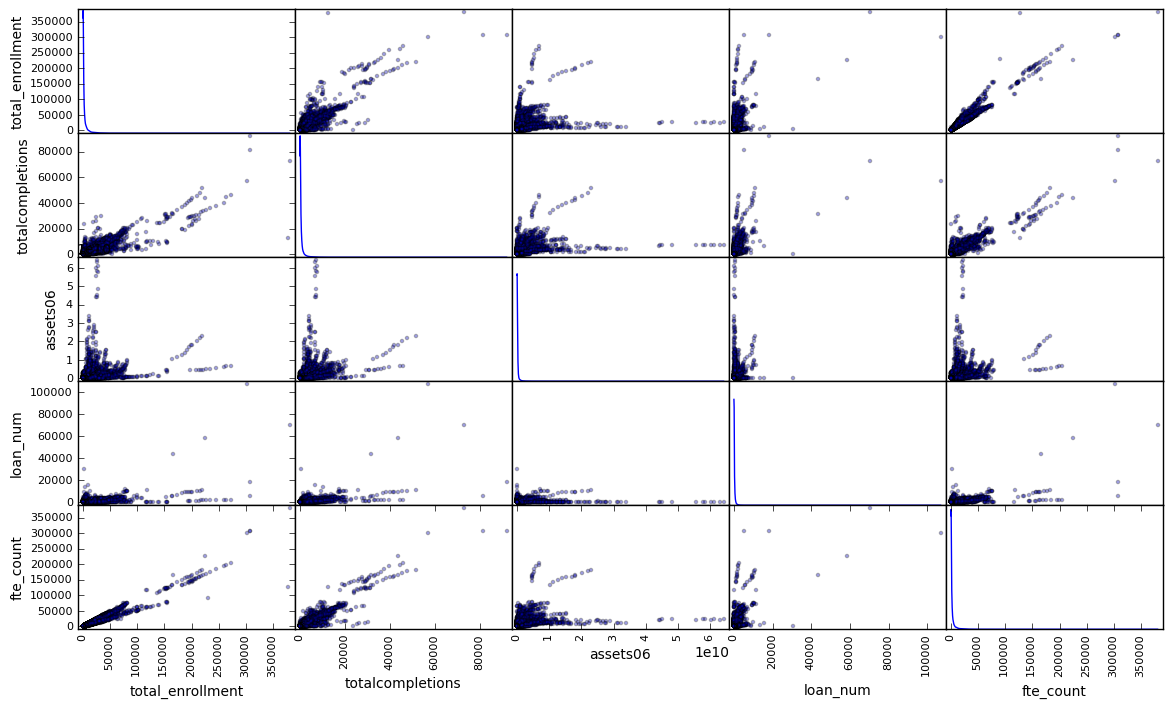

In [5]:
# Produce a scatter matrix for several sample pairs of features in the data
sample_cols = ['total_enrollment', 'totalcompletions', 'assets06', 'loan_num', 'fte_count']
display(data[sample_cols].describe())
pd.scatter_matrix(data[sample_cols], alpha = 0.3, figsize = (14,8), diagonal = 'kde');


In [6]:
# Impute missing data via mean
data = data.fillna(data.mean())
display(data[sample_cols].describe())

,total_enrollment,totalcompletions,assets06,loan_num,fte_count
count,153168.000000,153168.000000,1.531680e+05,153168.000000,153168.000000
mean,2809.486148,593.236129,1.798120e+08,240.711777,2112.358154
std,7540.511589,1388.100279,7.274573e+08,499.350609,5737.057026
min,0.000000,0.000000,-3.721908e+06,0.000000,0.000000
25%,101.000000,65.000000,3.773233e+07,111.000000,89.499972
50%,481.000000,233.000000,1.798120e+08,240.711777,442.000000
75%,2344.000000,593.236129,1.798120e+08,240.711777,1910.621316
max,380232.000000,92011.000000,6.410306e+10,106840.000000,380232.000000


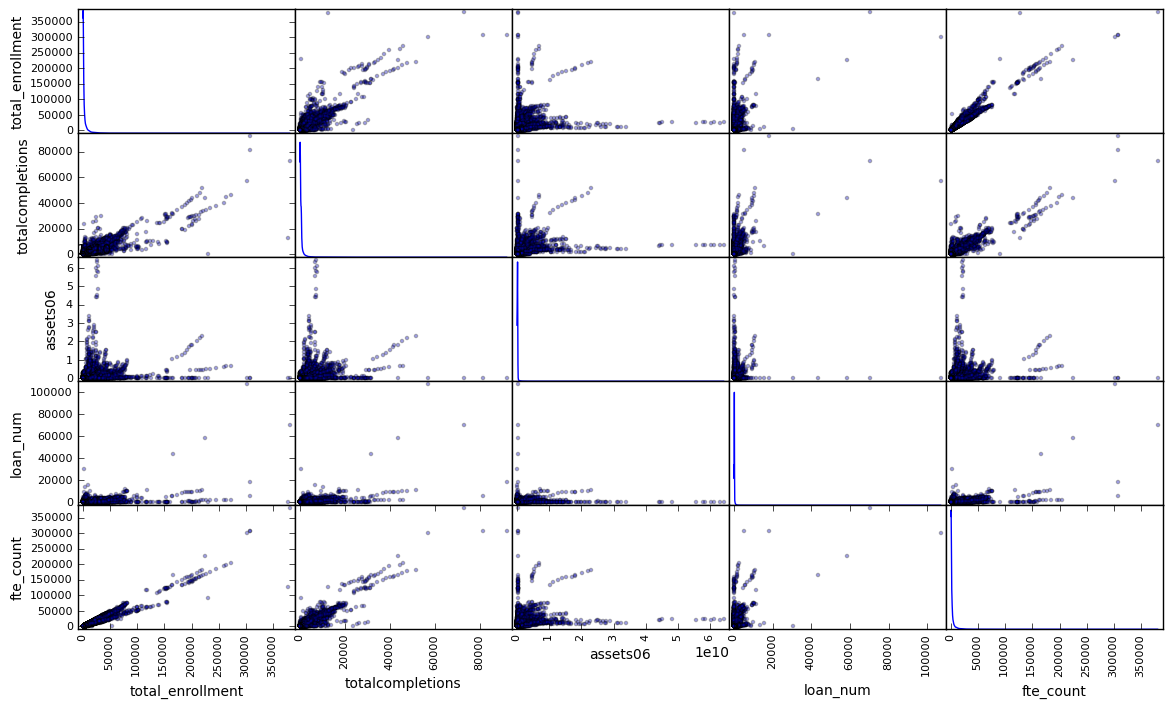

In [7]:
# Produce a scatter matrix for several sample pairs of features in the data
pd.scatter_matrix(data[sample_cols], alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [8]:
# Normalize all floating point columns
float64_columns = list(data.select_dtypes(include=['float64']).columns)

data[float64_columns] = np.log(data[float64_columns])
# the log(0) values were turned into -inf, we want those as zero for normalization
data = data.replace(-np.inf, 0)

display(data[sample_cols].describe())

,total_enrollment,totalcompletions,assets06,loan_num,fte_count
count,153168.000000,153168.000000,153156.000000,153168.000000,153168.000000
mean,6.178944,5.252602,17.945954,4.787847,6.013183
std,2.055412,1.652048,2.050991,1.663699,1.982545
min,0.000000,0.000000,0.000000,0.000000,-1.091427
25%,4.615121,4.174387,17.446863,4.709530,4.494238
50%,6.175867,5.451038,19.007423,5.483600,6.091310
75%,7.759614,6.385593,19.007423,5.483600,7.555184
max,12.848537,11.429663,24.883758,11.579088,12.848537


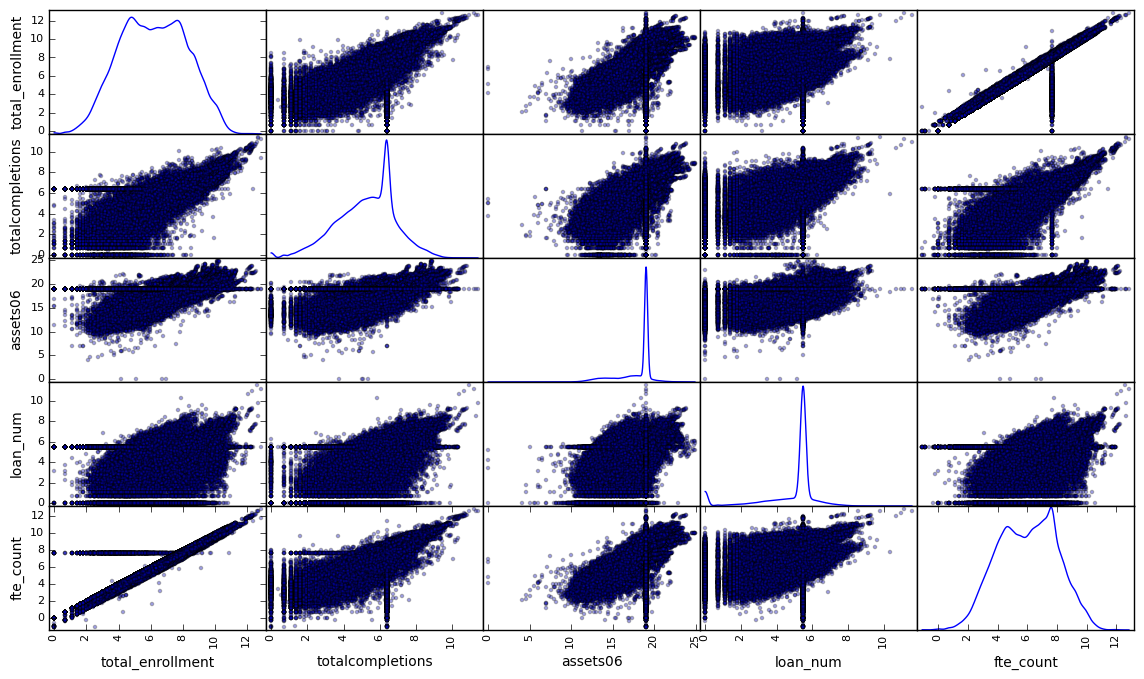

In [9]:
# Produce a scatter matrix for several normalized sample pairs of features in the data
pd.scatter_matrix(data[sample_cols], alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [22]:
# Isolate Target Variable
enrollment = data['total_enrollment']
features = data.drop('total_enrollment', axis = 1)

In [7]:
list(features)

NameError: name 'features' is not defined